# Assignments for Week-02

## 1. Re-code the house price machine learning

In [2]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
x,y = data['data'], data['target']

In [6]:
x_rm = x[:,5]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

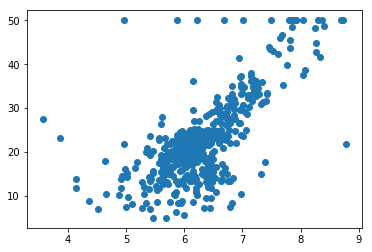

In [11]:
plt.scatter(x_rm, y)

### price

In [18]:
def price(rm, k, b):
    return rm*k+b

### loss

In [19]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### 1. Random Choose Method to get optimal k and b

In [23]:
import random

In [29]:
def random_find_k_b(trying_times):
    min_loss = float('inf')
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

        current_loss = loss(y, price_by_random_k_and_b)
    
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    return best_k, best_b

When time is : 0, get best_k: 59.85861110273737 best_b: 79.88793745573483, and the loss is: 189273.8278539751
When time is : 1, get best_k: -27.995212125835593 best_b: -79.48797095031459, and the loss is: 77983.665052409
When time is : 4, get best_k: -8.350991548913228 best_b: 95.85847030076525, and the loss is: 628.1004109817411
When time is : 13, get best_k: 15.398108415385664 best_b: -70.844935904185, and the loss is: 74.64826467887572
When time is : 65, get best_k: 8.197006017556618 best_b: -27.128978952387797, and the loss is: 47.43926713533292
When time is : 1227, get best_k: 8.785680305835626 best_b: -32.68645786508, and the loss is: 43.64990394878659


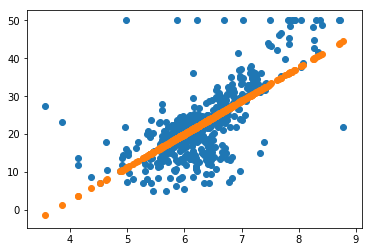

In [30]:
k,b = random_find_k_b(10000)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)

### 2.Supervised Direction to get optimal k and b

In [36]:
direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

def supervised_find_k_b(trying_times):
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100

    next_direction = random.choice(direction)

    scalar = 1.0

    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
        current_loss = loss(y, price_by_k_and_b)
    
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b

            next_direction = next_direction
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k, best_b

When time is : 0, get best_k: -77.94597090071994 best_b: -74.44354022025112, and the loss is: 348156.09535589156
When time is : 4, get best_k: -76.94597090071994 best_b: -73.44354022025112, and the loss is: 339574.07303937443
When time is : 5, get best_k: -75.94597090071994 best_b: -72.44354022025112, and the loss is: 331099.16790960415
When time is : 6, get best_k: -74.94597090071994 best_b: -71.44354022025112, and the loss is: 322731.3799665815
When time is : 7, get best_k: -73.94597090071994 best_b: -70.44354022025112, and the loss is: 314470.7092103053
When time is : 8, get best_k: -72.94597090071994 best_b: -69.44354022025112, and the loss is: 306317.15564077615
When time is : 9, get best_k: -71.94597090071994 best_b: -68.44354022025112, and the loss is: 298270.7192579939
When time is : 10, get best_k: -70.94597090071994 best_b: -67.44354022025112, and the loss is: 290331.40006195946
When time is : 11, get best_k: -69.94597090071994 best_b: -66.44354022025112, and the loss is: 282

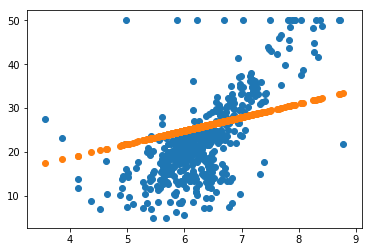

In [37]:
k,b = supervised_find_k_b(10000)
price_by_supervised_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_supervised_k_and_b)

### 3.Gradient Descent to get optimal k and b

### 4. Try different Loss function and learning rate.

## 2. Answer following questions:

1. Why do we need machine learning methods instead of creating a complicated formula?

==> 首先很难构造这样的复杂函数，其次即使创造的函数能符合目前的数据，但是未来的数据是未知的，构造的函数不能满足未来的数据。与其这样不如让机器根据已有的数据自己学习并构造这样的函数。

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

==> 第一种随机方法很盲目，虽然增加迭代次数可以让loss逐步变小，但是过程太漫长了。消耗时间多

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

==> 第二种有监督的方向学习比第一种好。

4. Why do we use Derivative / Gredient to fit a target function?

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:

7. Using the simple words to describe: What's the machine leanring.
Ans:

## 3. Finish the search problem

### 1. Get data from web page.

In [1]:
import requests
import re

In [2]:
def get_data_sub_links():
    base_link='http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId='
    url = r'http://www.njmetro.com.cn/njdtweb/home/go-line-intro.do?columnId=8a8080076512510d0165130727520004&rowId=8a80800765a29a780165a8538b6f0018'
    response = requests.get(url)
    what_we_want = r'<a href="javascript:;" id="([0-9a-f]+)" onclick="changeLine\(id\)" class="ser_02_ta" style="width:40px;">(.+号线)</a>'
    pattern = re.compile(what_we_want)
    likes = pattern.findall(response.text)
    sub_links = []
    for like in likes:
        link, name = like
        sub_links.append(base_link + link)
    return sub_links

In [3]:
sub_links = get_data_sub_links()
sub_links

['http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a8538b6f0018',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85300730016',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85265a30014',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a851d3490012',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85112650010',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a850496e000e',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84fbd81000c',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84d2c38000a',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84c8d350008',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a7b59

### 2. Preprocessing data from page source.

In [48]:
import json
def download_data(url):
    """ download data """
    try:
        r = requests.get(url)
        #the text is a json, convert it to python dictionary
        data = json.loads(r.text)
        html = data['articleContent']
        line_name = data['articleTitle']
        return html, line_name
    except:
        print("error")

In [49]:
import networkx as nx

In [50]:
G = nx.Graph()

In [51]:
from bs4 import BeautifulSoup
import bs4

def remove_last(text):
    if text == '南京站':
        return text
    if text == '南京南站':
        return text
    if text[-1] == '站':
        return text[:-1]
    return text

def fill_graph_by_oneline(graph, html, line_name):
    #use Beautifulsoup to extract data from table
    soup = BeautifulSoup(html, "html.parser")
    for tr in soup.find('tbody').children:
        if isinstance(tr, bs4.element.Tag):
            tds = tr('td')
            # tds[0] from--to tds[1] distance
            if tds[0].string:
                match_obj = re.match(r'(.+)——(.+)', tds[0].string)
                if match_obj:
                    f = remove_last(match_obj.group(1))
                    t = remove_last(match_obj.group(2))
                    d = int(tds[1].string)
                    #print(f, t, d)
                    graph.add_edge(f, t, weight=d, line=line_name)

In [52]:
line_list = []
for link in sub_links:
    html, line_name = download_data(link)
    line_list.append(line_name)
    fill_graph_by_oneline(G, html, line_name)
print(line_list)

['1号线', '2号线', '3号线', '4号线', '10号线', 'S1号线', 'S3号线', 'S7号线', 'S8号线', 'S9号线']


In [53]:
print("Nodes:", G.nodes())

Nodes: ['迈皋桥', '红山动物园', '南京站', '新模范马路', '玄武门', '鼓楼', '珠江路', '新街口', '张府园', '三山街', '中华门', '安德门', '天隆寺', '软件大道', '花神庙', '南京南站', '双龙大道', '河定桥', '胜太路', '百家湖', '小龙湾', '竹山路', '天印大道', '龙眠大道', '南医大江苏经贸学院', '南京交院', '中国药科大学', '油坊桥', '雨润大街', '元通', '奥体东', '兴隆大街', '集庆门大街', '云锦路', '莫愁湖', '汉中门', '上海路', '大行宫', '西安门', '明故宫', '苜蓿园', '下马坊', '孝陵卫', '钟灵街', '马群', '金马路', '仙鹤门', '学则路', '仙林中心', '羊山公园', '南大仙林校区', '经天路', '林场', '星火路', '东大成贤学院', '泰冯路', '天润城', '柳洲东路', '上元门', '五塘广场', '小市', '南京林业大学新庄', '鸡鸣寺', '浮桥', '常府街', '夫子庙', '武定门', '雨花门', '卡子门', '大明路', '明城大道', '宏运大道', '胜太西路', '天元西路', '九龙湖', '诚信大道', '东大九龙湖校区', '秣周东路', '龙江', '草场门', '云南路', '九华山', '岗子村', '蒋王庙', '王家湾', '聚宝山', '徐庄', '汇通路', '灵山', '东流', '孟北', '桦墅', '仙林湖', '小行', '中胜', '奥体中心', '梦都大街', '绿博园', '江心洲', '临江.青奥体育公园', '浦口万汇城', '南京工业大学', '龙华路', '文德路', '雨山路', '禄口机场', '翔宇路南', '翔宇路北', '正方中路', '吉印大道', '河海大学·佛城西路', '翠屏山', '景明佳园', '铁心桥', '春江路', '贾西', '永初路', '平良大街', '吴侯街', '高庙路', '天保', '刘村', '马骡圩', '兰花塘', '双垅', '石碛河', '桥林新城', '林山', '高家冲', '空港新城江宁', '柘塘', '空港新城溧水', '群力', '

In [54]:
print(G['南京南站'].items())

ItemsView(AtlasView({'花神庙': {'weight': 1853, 'line': '1号线'}, '双龙大道': {'weight': 2276, 'line': '1号线'}, '明城大道': {'weight': 1222, 'line': '3号线'}, '宏运大道': {'weight': 1105, 'line': '3号线'}, '翠屏山': {'weight': 4077, 'line': 'S1号线'}, '景明佳园': {'weight': 1963, 'line': 'S3号线'}}))


In [99]:
print(G['安德门'].items())

ItemsView(AtlasView({'中华门': {'weight': 2093, 'line': '1号线'}, '天隆寺': {'weight': 1455, 'line': '1号线'}, '小行': {'weight': 2157, 'line': '10号线'}}))


In [56]:
def dump_line(name):
    print(name)
    for (u, v, line) in G.edges.data('line'):
        if line == name:
            print(u,v)

In [60]:
dump_line('1号线')

1号线
迈皋桥 红山动物园
红山动物园 南京站
南京站 新模范马路
新模范马路 玄武门
玄武门 鼓楼
鼓楼 珠江路
珠江路 新街口
新街口 张府园
张府园 三山街
三山街 中华门
中华门 安德门
安德门 天隆寺
天隆寺 软件大道
软件大道 花神庙
花神庙 南京南站
南京南站 双龙大道
双龙大道 河定桥
河定桥 胜太路
胜太路 百家湖
百家湖 小龙湾
小龙湾 竹山路
竹山路 天印大道
天印大道 龙眠大道
龙眠大道 南医大江苏经贸学院
南医大江苏经贸学院 南京交院
南京交院 中国药科大学


In [61]:
dump_line('2号线')

2号线
新街口 上海路
新街口 大行宫
油坊桥 雨润大街
雨润大街 元通
元通 奥体东
奥体东 兴隆大街
兴隆大街 集庆门大街
集庆门大街 云锦路
云锦路 莫愁湖
莫愁湖 汉中门
汉中门 上海路
大行宫 西安门
西安门 明故宫
明故宫 苜蓿园
苜蓿园 下马坊
下马坊 孝陵卫
孝陵卫 钟灵街
钟灵街 马群
马群 金马路
金马路 仙鹤门
仙鹤门 学则路
学则路 仙林中心
仙林中心 羊山公园
羊山公园 南大仙林校区
南大仙林校区 经天路


In [57]:
dump_line('S3号线')

S3号线
南京南站 景明佳园
油坊桥 贾西
油坊桥 永初路
景明佳园 铁心桥
铁心桥 春江路
春江路 贾西
永初路 平良大街
平良大街 吴侯街
吴侯街 高庙路
高庙路 天保
天保 刘村
刘村 马骡圩
马骡圩 兰花塘
兰花塘 双垅
双垅 石碛河
石碛河 桥林新城
桥林新城 林山
林山 高家冲


In [62]:
dump_line('3号线')

3号线
南京站 小市
南京站 南京林业大学新庄
南京南站 明城大道
南京南站 宏运大道
大行宫 浮桥
大行宫 常府街
林场 星火路
星火路 东大成贤学院
东大成贤学院 泰冯路
泰冯路 天润城
天润城 柳洲东路
柳洲东路 上元门
上元门 五塘广场
五塘广场 小市
南京林业大学新庄 鸡鸣寺
鸡鸣寺 浮桥
常府街 夫子庙
夫子庙 武定门
武定门 雨花门
雨花门 卡子门
卡子门 大明路
大明路 明城大道
宏运大道 胜太西路
胜太西路 天元西路
天元西路 九龙湖
九龙湖 诚信大道
诚信大道 东大九龙湖校区
东大九龙湖校区 秣周东路


In [63]:
dump_line('10号线')

10号线
安德门 小行
元通 中胜
元通 奥体中心
小行 中胜
奥体中心 梦都大街
梦都大街 绿博园
绿博园 江心洲
江心洲 临江.青奥体育公园
临江.青奥体育公园 浦口万汇城
浦口万汇城 南京工业大学
南京工业大学 龙华路
龙华路 文德路
文德路 雨山路


In [65]:
print("新街口==>大行宫:", G['新街口']['大行宫'])

新街口==>大行宫: {'weight': 1022, 'line': '2号线'}


In [66]:
print("大行宫==>新街口:", G['大行宫']['新街口'])

大行宫==>新街口: {'weight': 1022, 'line': '2号线'}


In [67]:
print("新街口==>张府园:", G['新街口']['张府园'])

新街口==>张府园: {'weight': 1125, 'line': '1号线'}


### 3. Build the search agent

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
import matplotlib
print(matplotlib.__path__)
plt.rcParams['savefig.dpi'] = 600 #图片像素
plt.rcParams['figure.dpi'] = 600 #分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#from matplotlib.font_manager import _rebuild
#_rebuild()

['D:\\Program\\Anaconda3\\lib\\site-packages\\matplotlib']


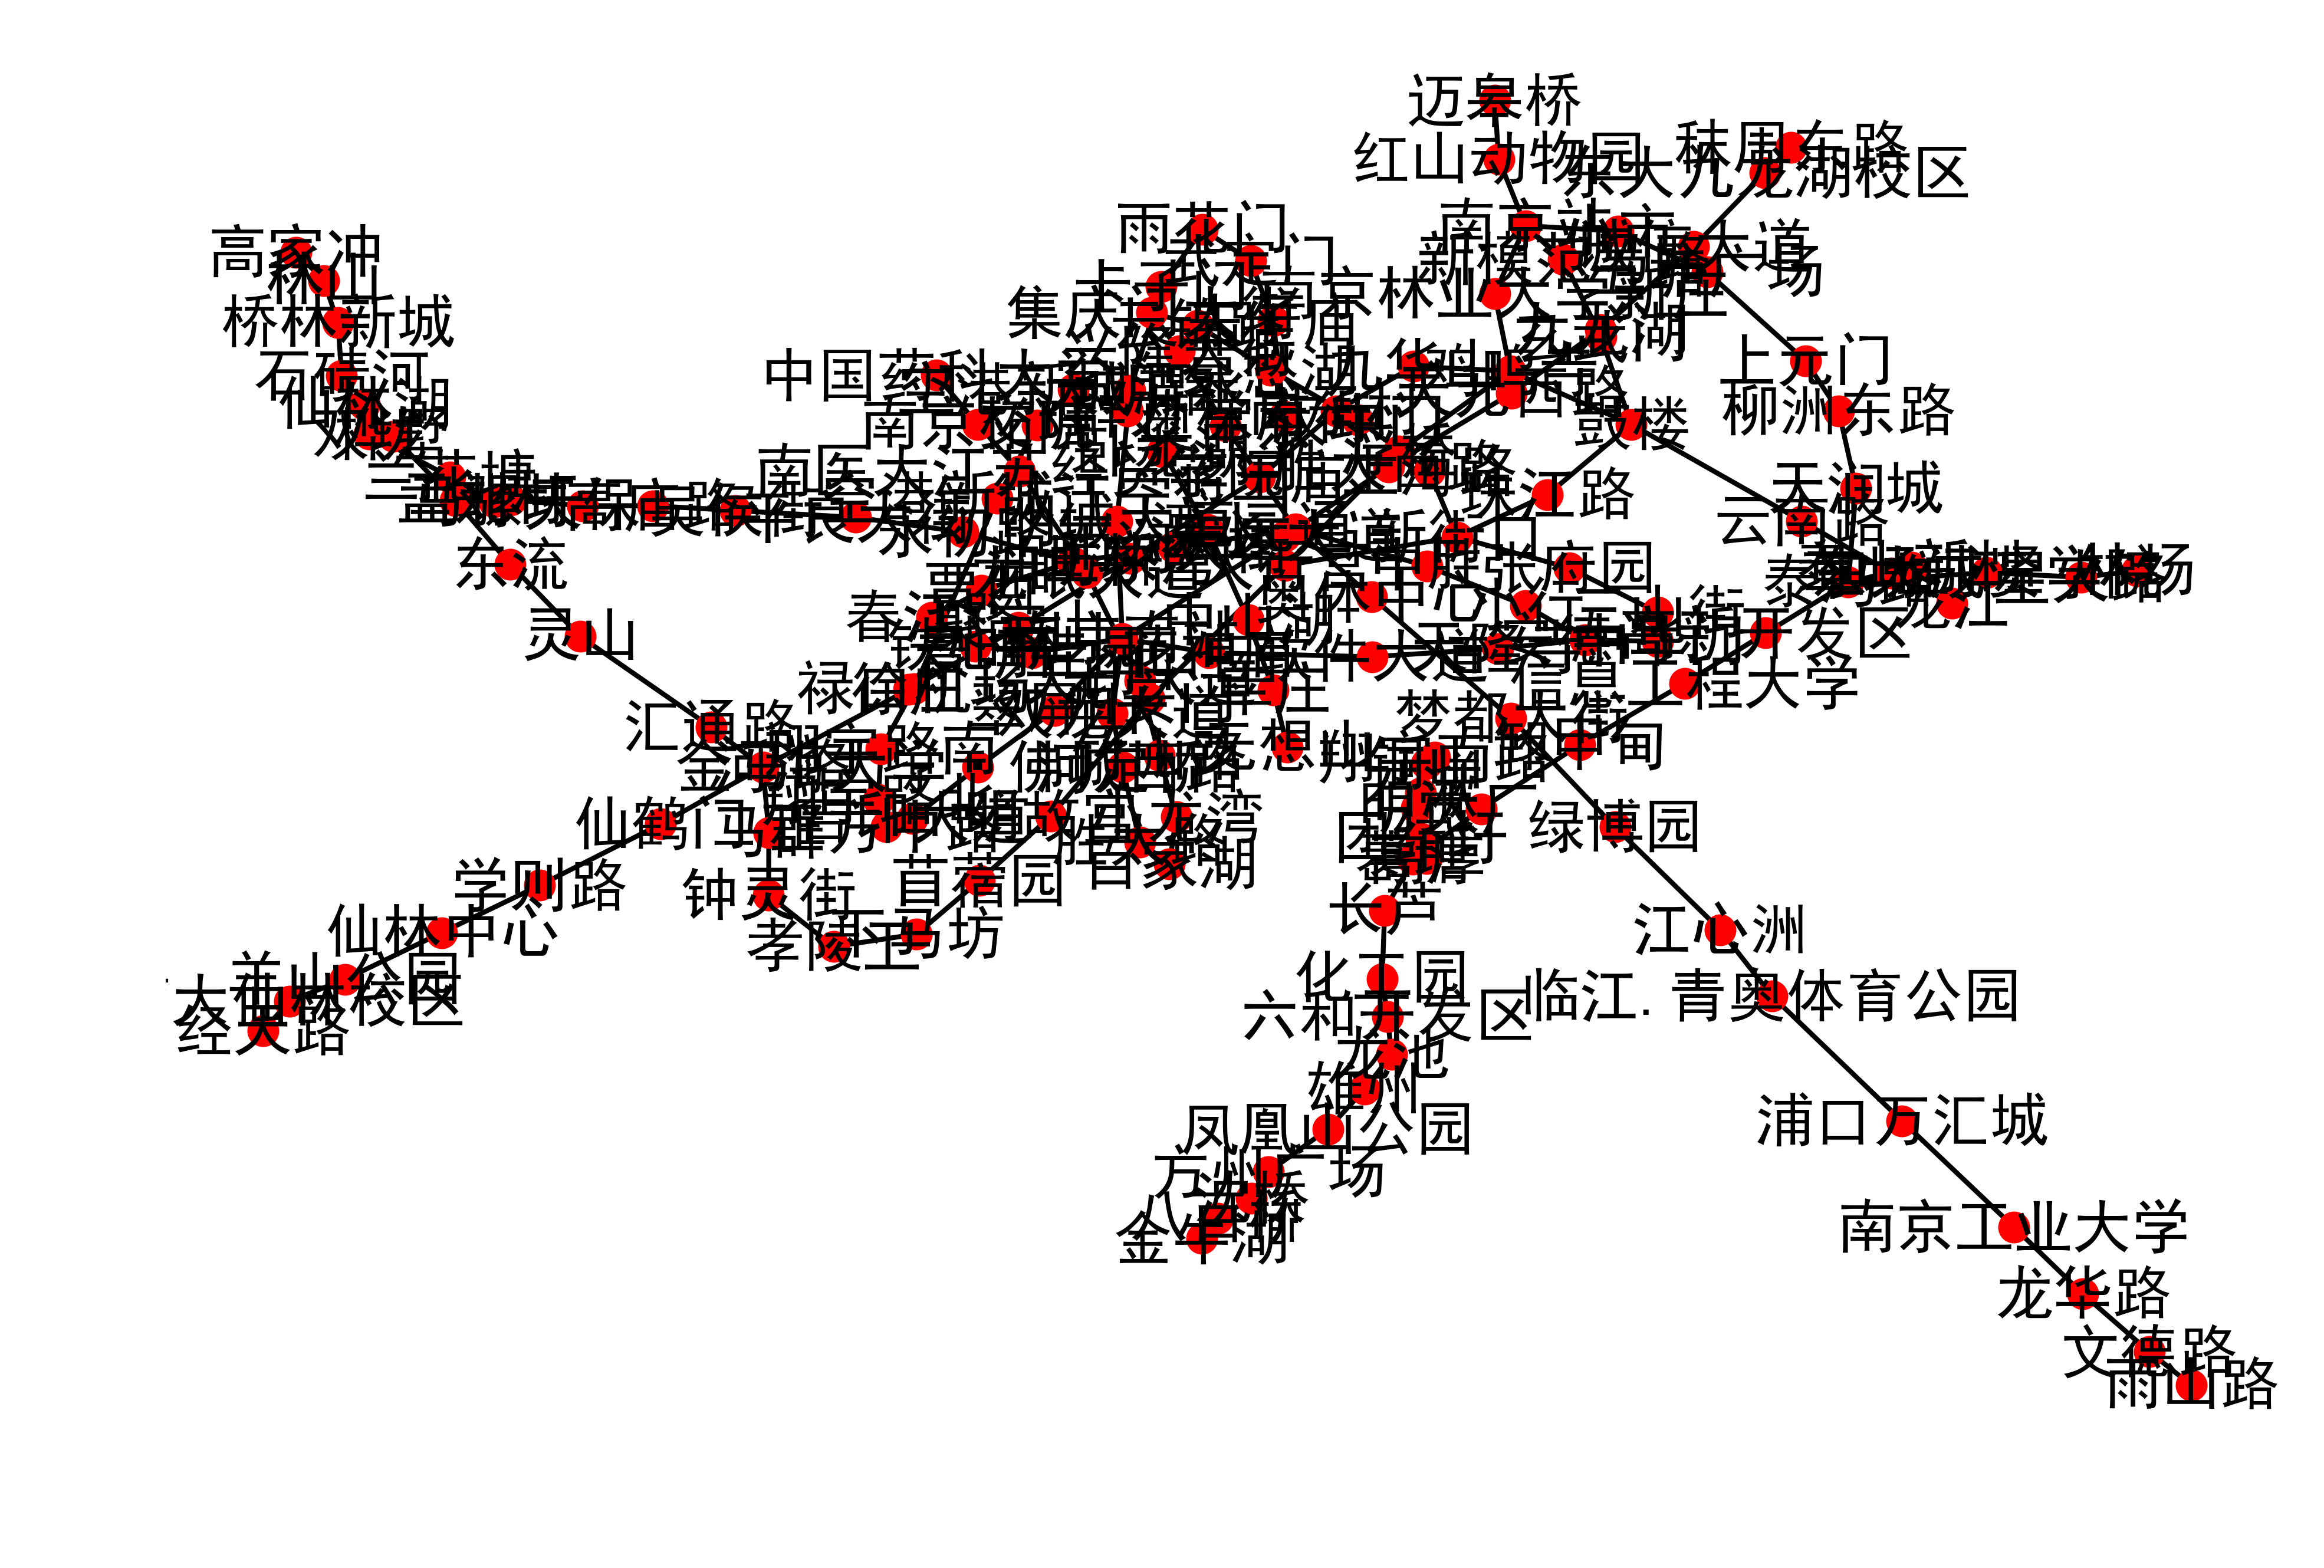

In [70]:
nx.draw(G, with_labels=True, node_size=30)

In [71]:
def search_normal(station_from, station_to, graph):
    pathes = [[station_from]]
    
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = graph[froninter]
        for station, eattr in successors.items():
            if station in path: continue  # eliminate loop
            new_path = path + [station]
            pathes.append(new_path)
            #print(new_path)
            if station == station_to: return new_path
        
        visitied.add(froninter)

In [74]:
search_normal('百家湖', '南京站', G)

['百家湖',
 '胜太路',
 '河定桥',
 '双龙大道',
 '南京南站',
 '明城大道',
 '大明路',
 '卡子门',
 '雨花门',
 '武定门',
 '夫子庙',
 '常府街',
 '大行宫',
 '浮桥',
 '鸡鸣寺',
 '南京林业大学新庄',
 '南京站']

### 4 Create different policies for transfer system.

In [75]:
def search(station_from, station_to, graph, sort_candidate):
    pathes = [[station_from]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = graph[froninter]
        
        for station, eattr in successors.items():
            if station in path: continue  # eliminate loop
            new_path = path + [station]
            pathes.append(new_path)
            #print(new_path)
            if station == station_to: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(graph, pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [76]:
def transfer_line_less_first(graph, pathes):
    if len(pathes) <= 1: return pathes
    
    def get_switch_num(path):
        switch = 0
        last_line = graph.edges[path[0], path[1]]['line']
        
        for i, station in enumerate(path[:-1]):
            if i == 0:
                continue
            else:
                if last_line != graph.edges[station, path[i+1]]['line']:
                    switch += 1
                    last_line = graph.edges[path[0], path[1]]['line']

        return switch

    return sorted(pathes, key=get_switch_num)

In [77]:
def shortest_path_first(graph, pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i, station in enumerate(path[:-1]):
            distance += graph.edges[station, path[i+1]]['weight']
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [78]:
search('百家湖', '南京站', G, transfer_line_less_first)

['百家湖',
 '胜太路',
 '河定桥',
 '双龙大道',
 '南京南站',
 '花神庙',
 '软件大道',
 '天隆寺',
 '安德门',
 '中华门',
 '三山街',
 '张府园',
 '新街口',
 '珠江路',
 '鼓楼',
 '玄武门',
 '新模范马路',
 '南京站']

In [79]:
search('百家湖', '南京站', G, shortest_path_first)

['百家湖',
 '胜太路',
 '河定桥',
 '双龙大道',
 '南京南站',
 '明城大道',
 '大明路',
 '卡子门',
 '雨花门',
 '武定门',
 '夫子庙',
 '常府街',
 '大行宫',
 '浮桥',
 '鸡鸣寺',
 '南京林业大学新庄',
 '南京站']

In [80]:
def find_all_path(start, end, graph):
    pathes = []

    visited={}
    for f, t in graph.edges():
        if f in visited:
            visited[f].update({t: False})
        else:
            visited.update({f:{t: False}})
        if t in visited:
            visited[t].update({f: False})
        else:
            visited.update({t:{f: False}})

    stack=[]
    stack.append(start)
    while stack:
        curr = stack[-1]
        if curr == end:
            pathes.append(stack.copy());
            stack.pop()
        else:
            next = None
            for nb, eattr in graph[curr].items():
                if (nb not in stack) and (not visited[curr][nb]):
                    next = nb
                    break
            if None == next:
                stack.pop()
                for nb, eattr in graph[curr].items():
                    visited[curr][nb] = False
            else:
                stack.append(next)
                visited[curr][next] = True
    return pathes

In [81]:
for path in find_all_path('百家湖', '云锦路', G):
    print(path)

['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '花神庙', '软件大道', '天隆寺', '安德门', '中华门', '三山街', '张府园', '新街口', '上海路', '汉中门', '莫愁湖', '云锦路']
['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '花神庙', '软件大道', '天隆寺', '安德门', '小行', '中胜', '元通', '奥体东', '兴隆大街', '集庆门大街', '云锦路']
['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '明城大道', '大明路', '卡子门', '雨花门', '武定门', '夫子庙', '常府街', '大行宫', '新街口', '张府园', '三山街', '中华门', '安德门', '小行', '中胜', '元通', '奥体东', '兴隆大街', '集庆门大街', '云锦路']
['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '明城大道', '大明路', '卡子门', '雨花门', '武定门', '夫子庙', '常府街', '大行宫', '新街口', '上海路', '汉中门', '莫愁湖', '云锦路']
['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '明城大道', '大明路', '卡子门', '雨花门', '武定门', '夫子庙', '常府街', '大行宫', '西安门', '明故宫', '苜蓿园', '下马坊', '孝陵卫', '钟灵街', '马群', '金马路', '徐庄', '聚宝山', '王家湾', '蒋王庙', '岗子村', '九华山', '鸡鸣寺', '南京林业大学新庄', '南京站', '新模范马路', '玄武门', '鼓楼', '珠江路', '新街口', '张府园', '三山街', '中华门', '安德门', '小行', '中胜', '元通', '奥体东', '兴隆大街', '集庆门大街', '云锦路']
['百家湖', '胜太路', '河定桥', '双龙大道', '南京南站', '明城大道', '大明路', '卡子门', '雨花门', '武定门', '夫子庙', '常府街', '大行宫', '西安门', '明故宫', '苜蓿园', '下马坊',

In [93]:
def search_by_way(station_from, station_to, graph, by_way):
    new_pathes = []
    pathes = find_all_path(station_from, station_to, graph)
    
    for path in pathes:
        if set(by_way).issubset(set(path)):
            new_pathes.append(path)
    return new_pathes

In [98]:
search_by_way('百家湖', '云锦路', G, ['铁心桥'])

[['百家湖',
  '胜太路',
  '河定桥',
  '双龙大道',
  '南京南站',
  '景明佳园',
  '铁心桥',
  '春江路',
  '贾西',
  '油坊桥',
  '雨润大街',
  '元通',
  '奥体东',
  '兴隆大街',
  '集庆门大街',
  '云锦路'],
 ['百家湖',
  '胜太路',
  '河定桥',
  '双龙大道',
  '南京南站',
  '景明佳园',
  '铁心桥',
  '春江路',
  '贾西',
  '油坊桥',
  '雨润大街',
  '元通',
  '中胜',
  '小行',
  '安德门',
  '中华门',
  '三山街',
  '张府园',
  '新街口',
  '上海路',
  '汉中门',
  '莫愁湖',
  '云锦路']]

### 5. Test your result with commercial applications.